In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('Airlines+Data (1).xlsx',
                       index_col=0, 
                       parse_dates=['Month'])
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [5]:
df.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

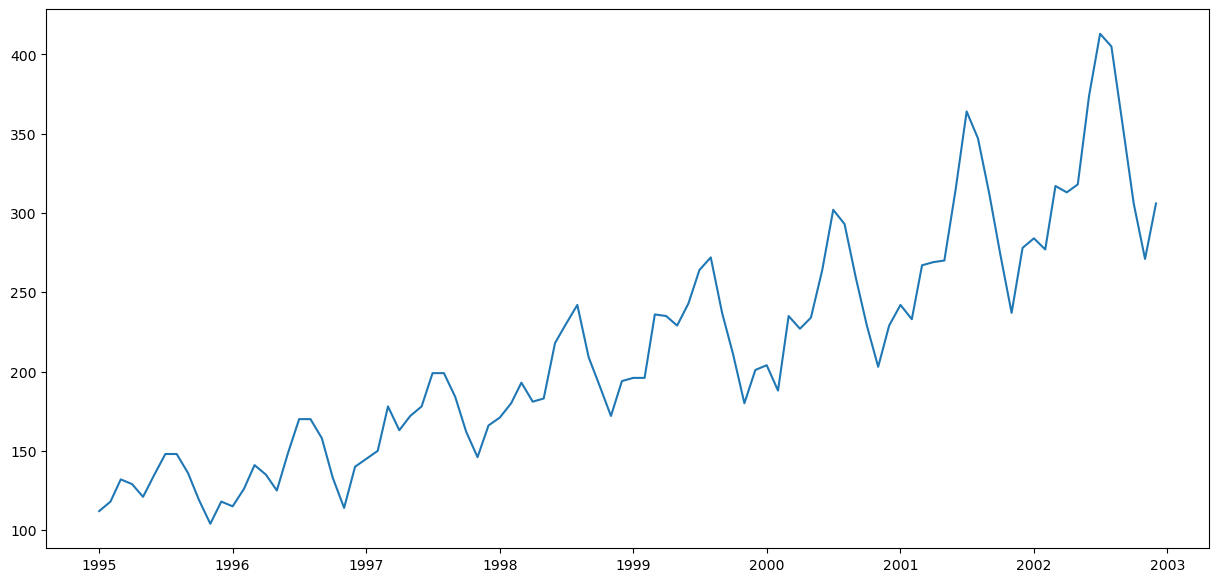

In [6]:
plt.figure(figsize = (15,7))
plt.plot(df)

In [7]:
df = pd.read_excel("Airlines+Data (1).xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True)
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

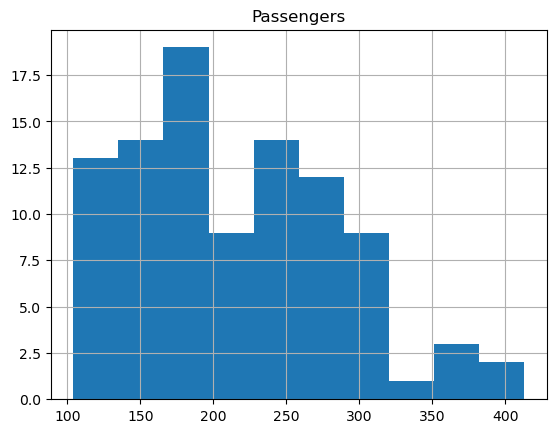

In [8]:
# create a histogram plot
df.hist()

<AxesSubplot:ylabel='Density'>

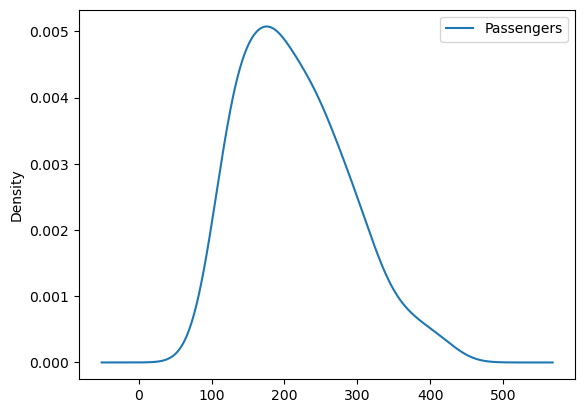

In [9]:
df.plot(kind='kde')

In [10]:
df = pd.read_excel("Airlines+Data (1).xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                     squeeze=True)
df

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [11]:
type(df)

pandas.core.series.Series

In [12]:
groups = df.groupby(pd.Grouper(freq='A'))
groups

In [13]:
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years

,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


<AxesSubplot:>

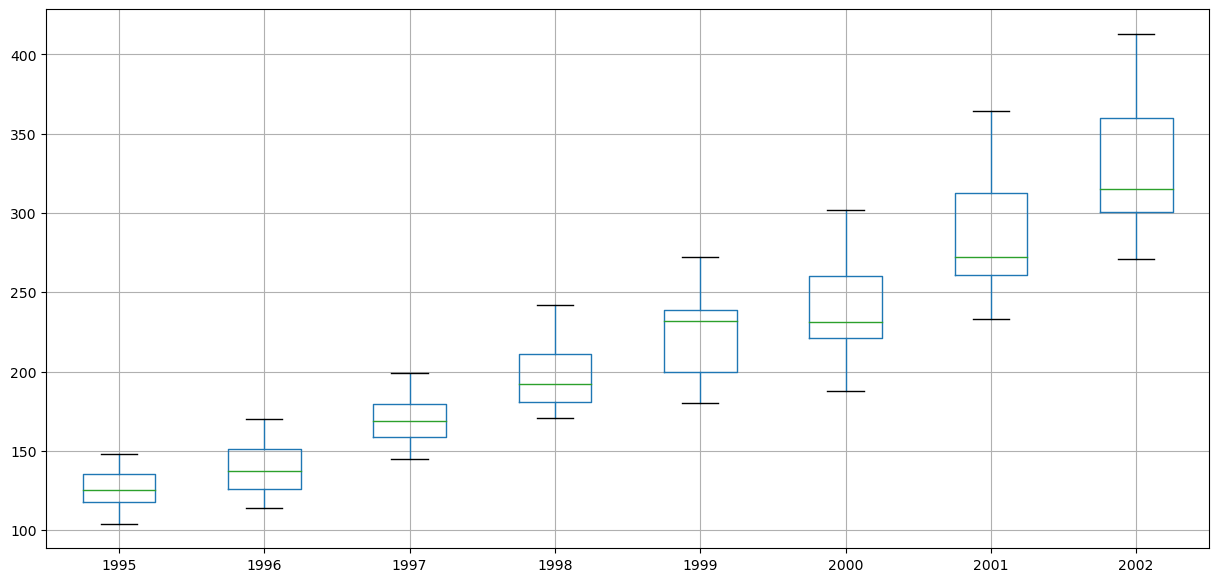

In [14]:
plt.figure(figsize = (15,7))
years.boxplot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

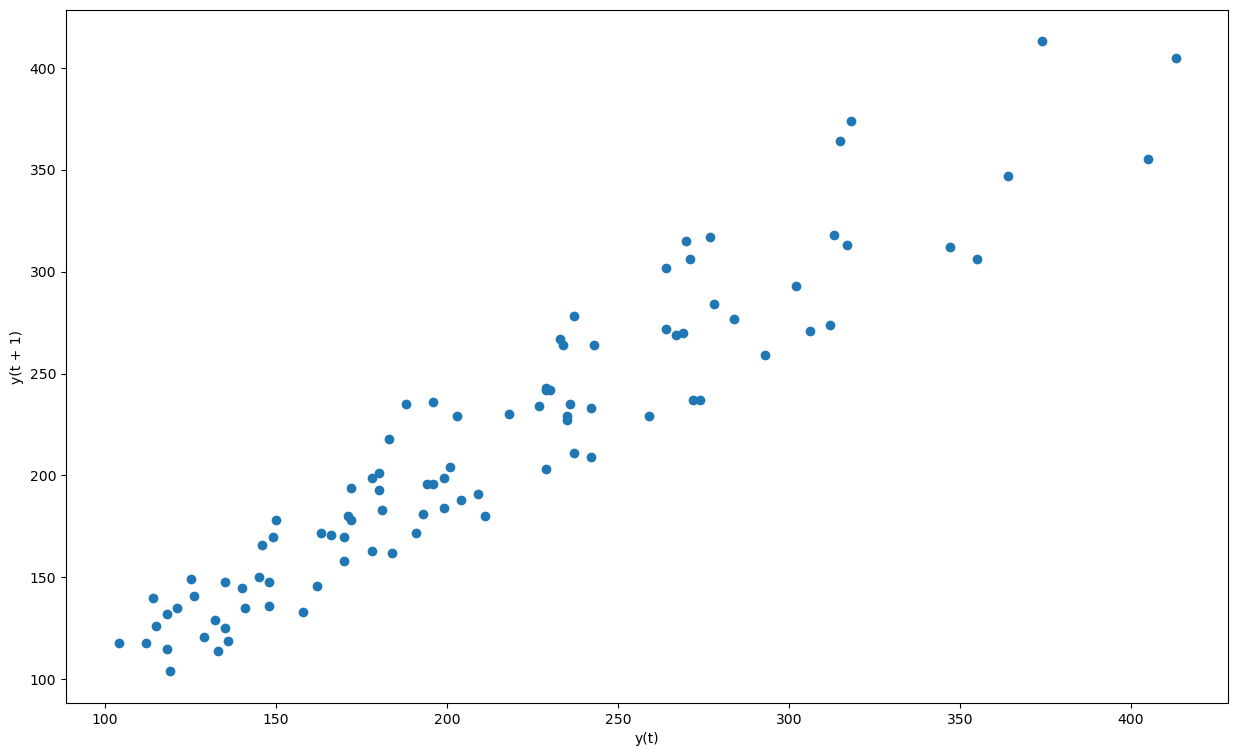

In [15]:
plt.figure(figsize = (15,9))
pd.plotting.lag_plot(df)

<Figure size 3200x2000 with 0 Axes>

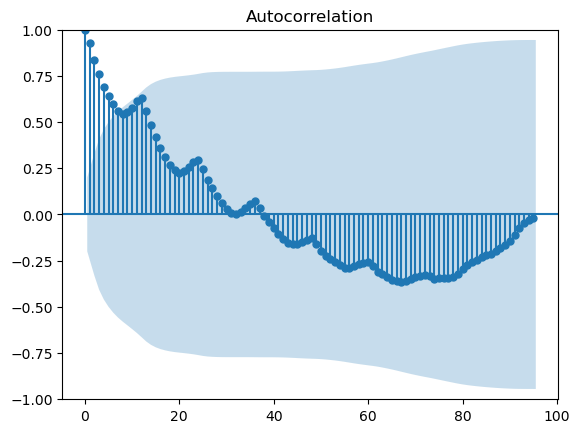

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (32,20))
plot_acf(df, lags=95)
plt.show()

In [17]:
df = pd.read_excel("Airlines+Data (1).xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                     squeeze=True)
df

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [18]:
df.shape

(96,)

In [19]:
upsampled = df.resample('D').mean()
upsampled.head(20)

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
1995-01-11      NaN
1995-01-12      NaN
1995-01-13      NaN
1995-01-14      NaN
1995-01-15      NaN
1995-01-16      NaN
1995-01-17      NaN
1995-01-18      NaN
1995-01-19      NaN
1995-01-20      NaN
Freq: D, Name: Passengers, dtype: float64

In [20]:
upsampled.shape

(2892,)

In [21]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(30)

Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
1995-01-06    112.967742
1995-01-07    113.161290
1995-01-08    113.354839
1995-01-09    113.548387
1995-01-10    113.741935
1995-01-11    113.935484
1995-01-12    114.129032
1995-01-13    114.322581
1995-01-14    114.516129
1995-01-15    114.709677
1995-01-16    114.903226
1995-01-17    115.096774
1995-01-18    115.290323
1995-01-19    115.483871
1995-01-20    115.677419
1995-01-21    115.870968
1995-01-22    116.064516
1995-01-23    116.258065
1995-01-24    116.451613
1995-01-25    116.645161
1995-01-26    116.838710
1995-01-27    117.032258
1995-01-28    117.225806
1995-01-29    117.419355
1995-01-30    117.612903
Freq: D, Name: Passengers, dtype: float64

<AxesSubplot:xlabel='Month'>

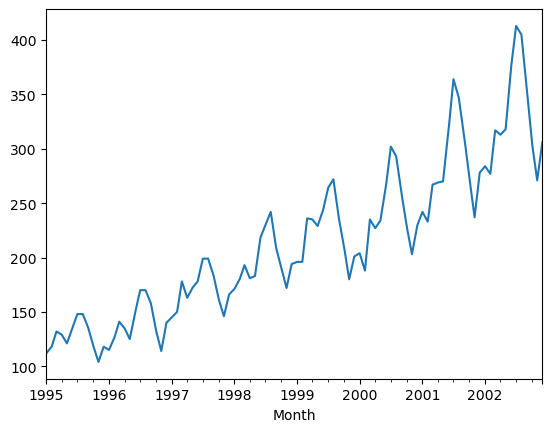

In [22]:
interpolated.plot()

<AxesSubplot:xlabel='Month'>

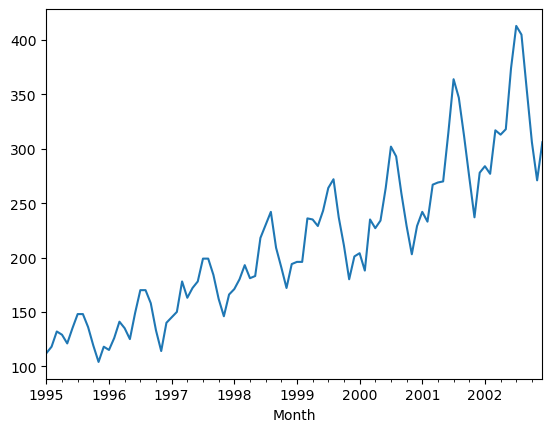

In [23]:
df.plot()

<AxesSubplot:xlabel='Month'>

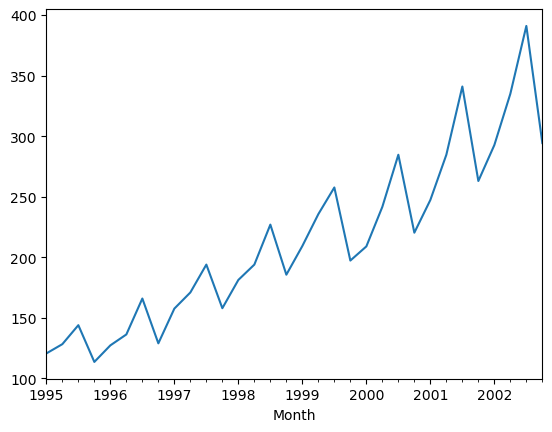

In [24]:
resample = df.resample('Q')
quarterly_mean_sales = resample.mean()
quarterly_mean_sales.plot()

In [26]:
df=pd.read_excel("Airlines+Data (1).xlsx",index_col=0,header=0, parse_dates=True)
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


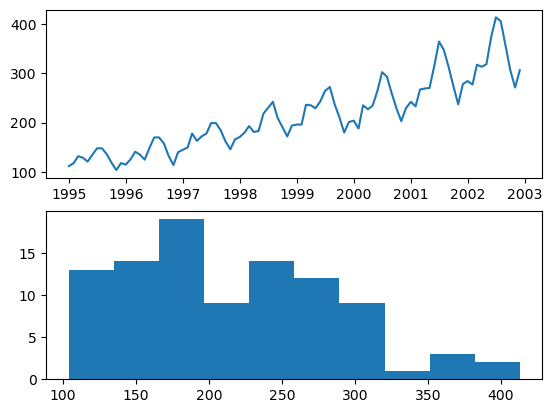

In [27]:
# line plot
plt.subplot(211)
plt.plot(df)

# histogram
plt.subplot(212)
plt.hist(df)

plt.show()

In [28]:
dataframe = pd.DataFrame(np.log(df.values), columns = ['Passengers'])
dataframe

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
91,6.003887
92,5.872118
93,5.723585
94,5.602119


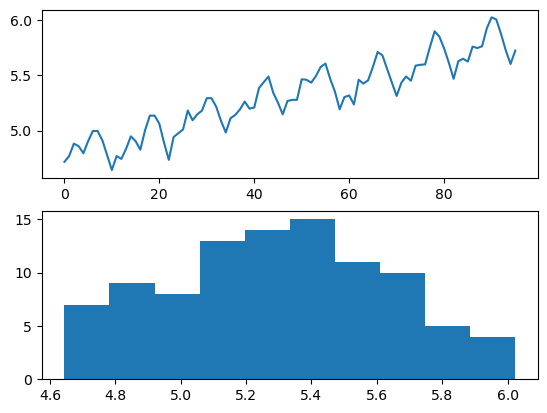

In [29]:
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])

# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [30]:
quarterly_mean_sales.head()

Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
Freq: Q-DEC, Name: Passengers, dtype: float64

In [31]:
dataframe = pd.DataFrame(np.sqrt(df.values), columns = ['Passengers'])
dataframe

,Passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000
...,...
91,20.124612
92,18.841444
93,17.492856
94,16.462078


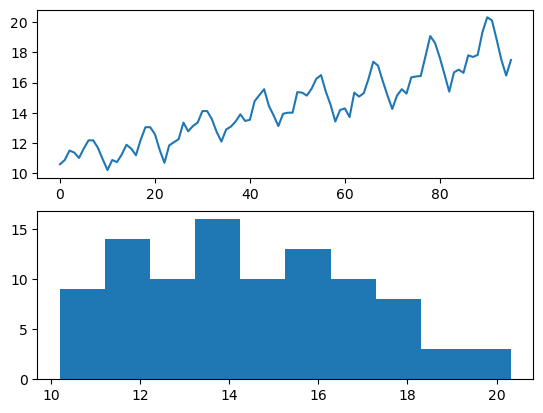

In [32]:
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])

# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [33]:
df=pd.read_excel("Airlines+Data (1).xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

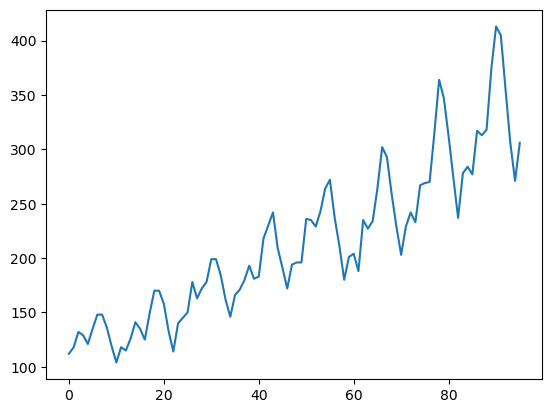

In [34]:
df['Passengers'].plot()

In [35]:
df["month"] = df['Month'].dt.strftime("%b") # month extraction
df["year"] = df['Month'].dt.strftime("%Y") # year extraction
df

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [36]:
mp = pd.pivot_table(data = df,
                                 values = "Passengers",
                                 index = "year",
                                 columns = "month",
                                 aggfunc = "mean",
                                 fill_value=0)
mp

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


In [37]:
mp = pd.pivot_table(data = df,
                                 values = "Passengers",
                                 index = "year",
                                 columns = "month",
                                 aggfunc = "mean",
                                 fill_value=0)
mp

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<AxesSubplot:xlabel='month', ylabel='year'>

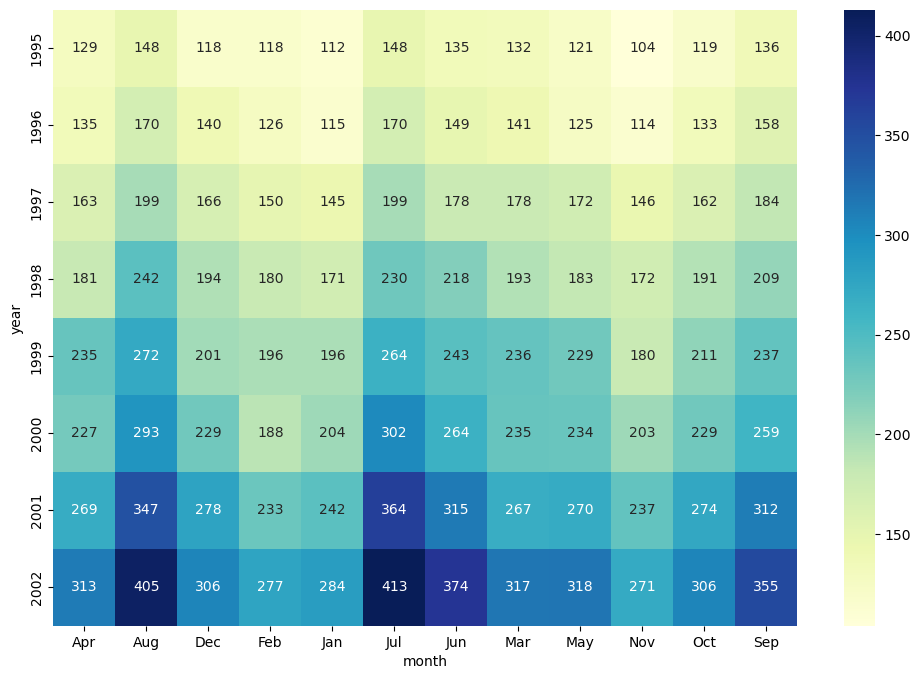

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(mp,
            annot=True,
            fmt="g",
            cmap = 'YlGnBu') #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Passengers'>

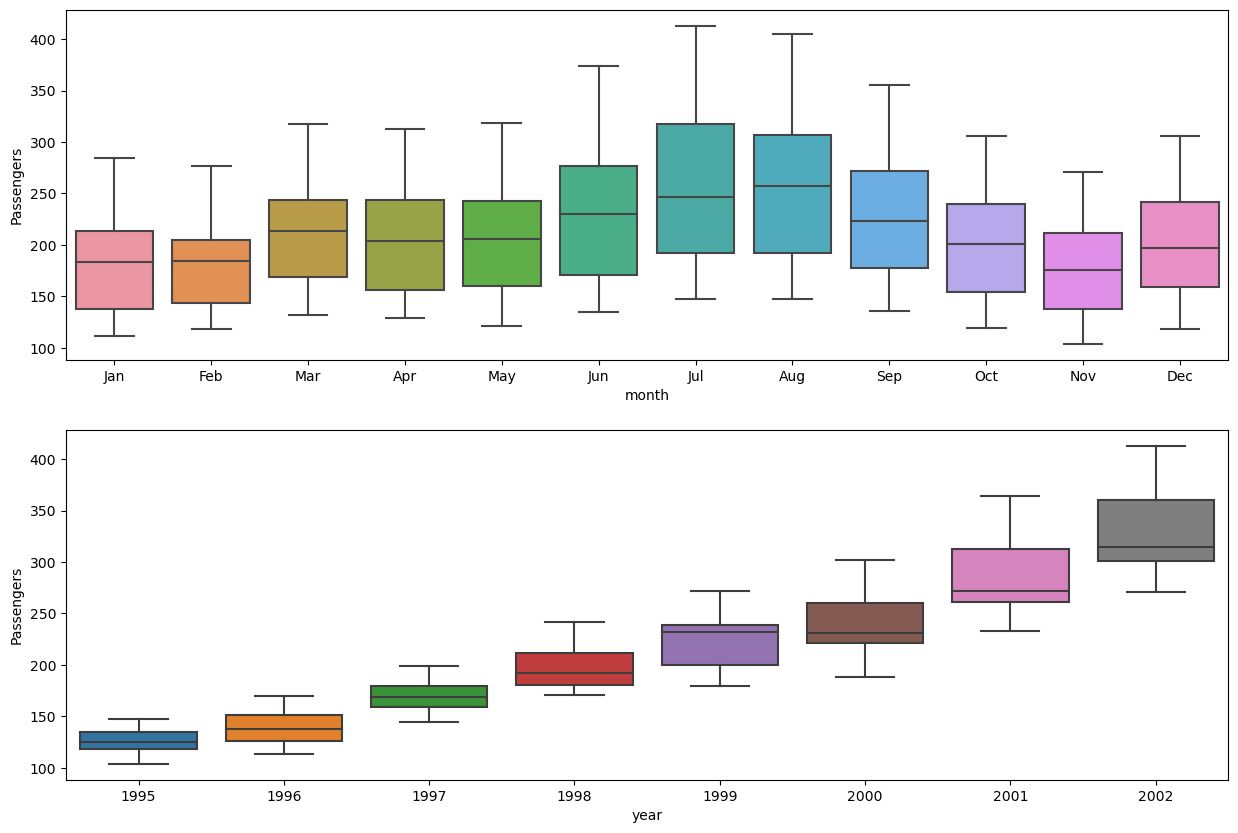

In [39]:
# Boxplot for ever
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=df)

plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

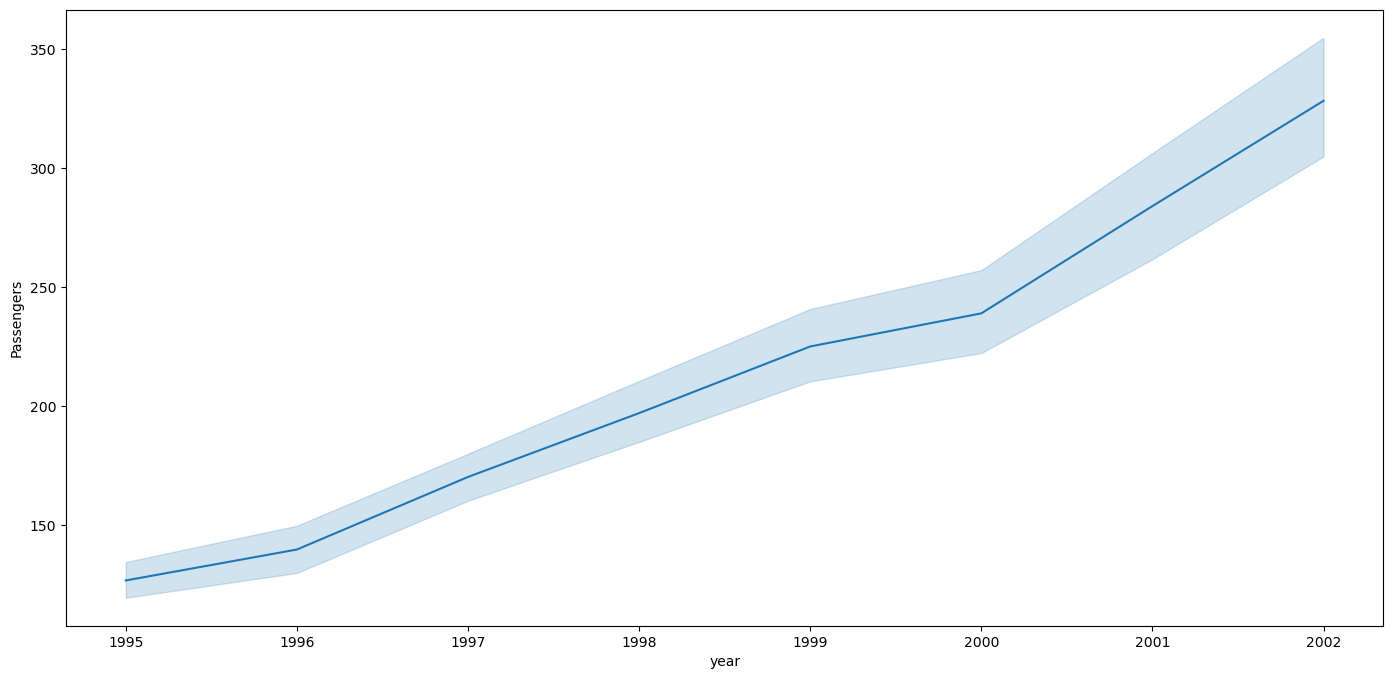

In [40]:
plt.figure(figsize=(17,8))
sns.lineplot(x="year",y="Passengers",data=df)

In [41]:
df

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [42]:
df.shape

(96, 4)

In [45]:
df['t']=np.arange(1,97)
df['t_square']=np.square(df.t)
df['log_Passengers']=np.log(df.Passengers)
df2=pd.get_dummies(df['month'])

In [46]:
df

,Month,Passengers,month,year,t,t_square,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887
92,2002-09-01,355,Sep,2002,93,8649,5.872118
93,2002-10-01,306,Oct,2002,94,8836,5.723585
94,2002-11-01,271,Nov,2002,95,9025,5.602119


In [47]:
df2

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
df=pd.concat([df,df2],axis=1)
df

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
Train = df.head(84)
Test = df.tail(12)
Train

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2001-08-01,347,Aug,2001,80,6400,5.849325,0,1,0,0,0,0,0,0,0,0,0,0
80,2001-09-01,312,Sep,2001,81,6561,5.743003,0,0,0,0,0,0,0,0,0,0,0,1
81,2001-10-01,274,Oct,2001,82,6724,5.613128,0,0,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,Nov,2001,83,6889,5.468060,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480267

In [51]:
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.05188897933096

In [52]:
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612086606

In [53]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708646

In [54]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

10.519172544323613

In [55]:
mult_sea_Quad = smf.ols('log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

325.7312105213405

In [65]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

NameError: name 'rmse_add_sea' is not defined

In [66]:
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=df).fit()
pred_new  = pd.Series(model_full.predict(df))
pred_new

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [67]:
df["forecasted_Passengers"] = pd.Series(np.exp(pred_new))

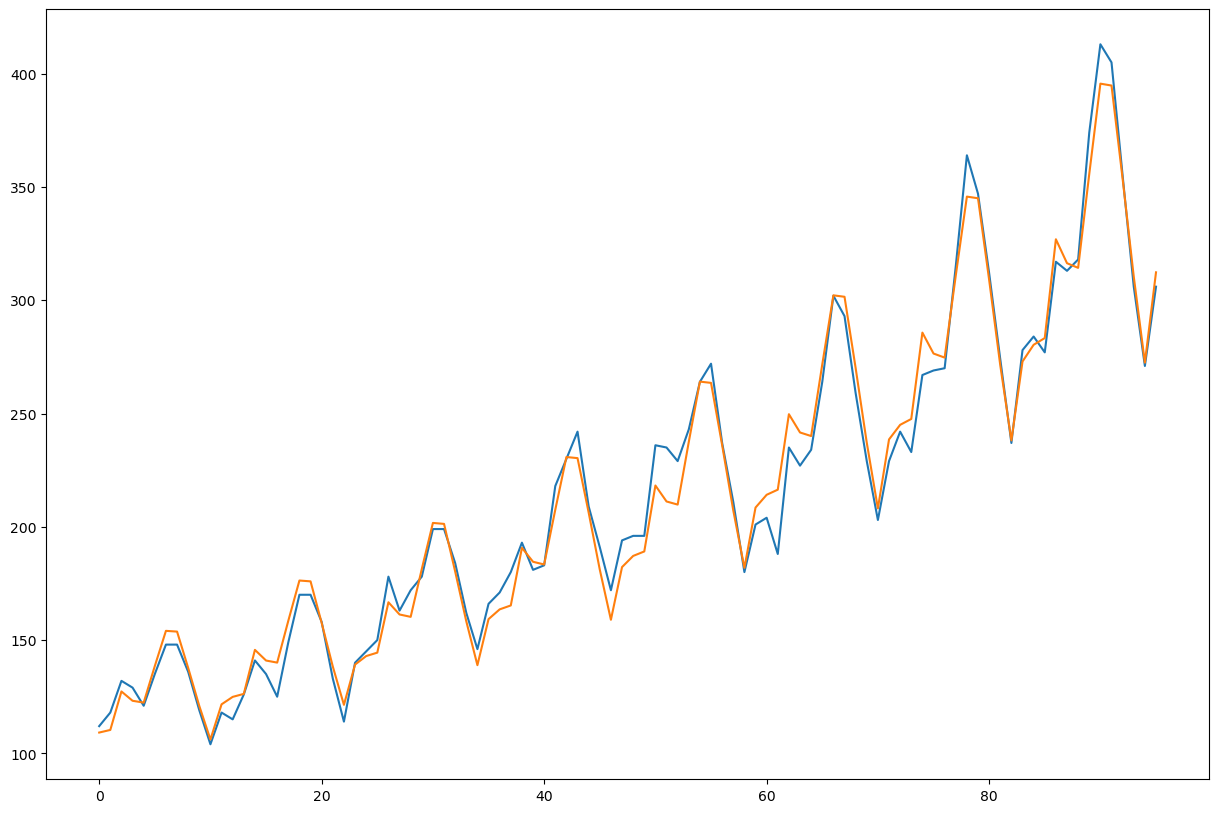

In [68]:
plt.figure(figsize=(15,10))
plt.plot(df[['Passengers','forecasted_Passengers']].reset_index(drop=True))

In [70]:
df=pd.read_excel("Airlines+Data (1).xlsx")
Train = df.head(84)
Test = df.tail(12)

In [71]:
Train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237


In [72]:
Test

,Month,Passengers
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306


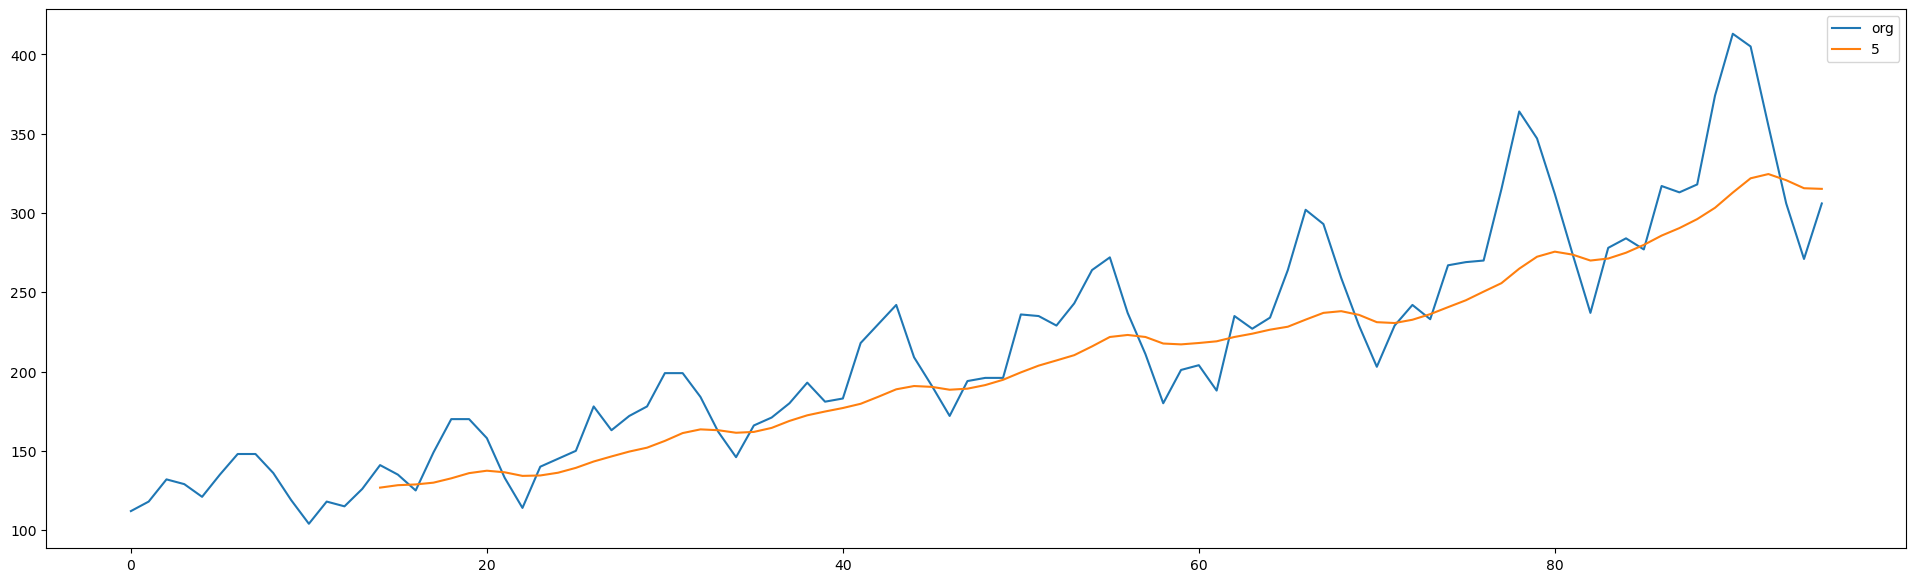

In [73]:
plt.figure(figsize=(24,7))
df['Passengers'].plot(label="org")
df["Passengers"].rolling(15).mean().plot(label=str(5))
plt.legend(loc='best')

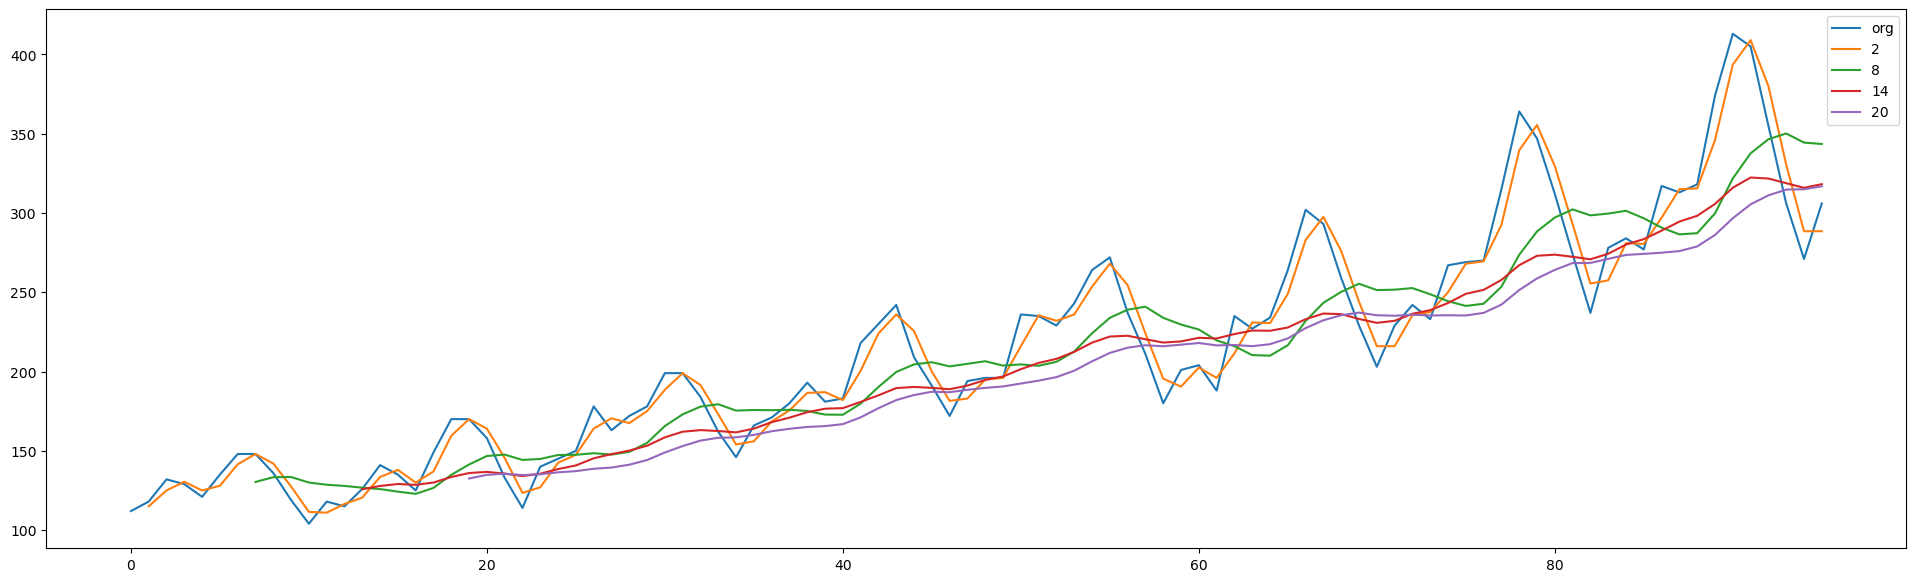

In [74]:
plt.figure(figsize=(24,7))
df['Passengers'].plot(label="org")
for i in range(2,24,6):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

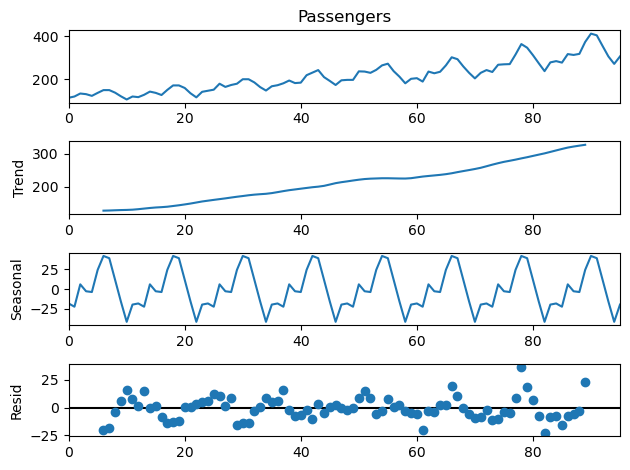

In [75]:
decompose_ts_add = seasonal_decompose(df['Passengers'], period = 12)
decompose_ts_add.plot()
plt.show()

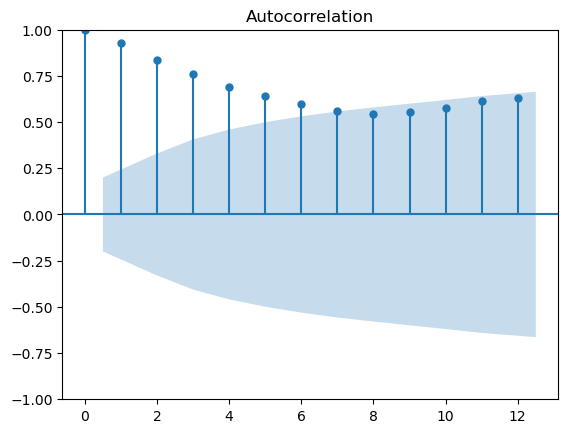

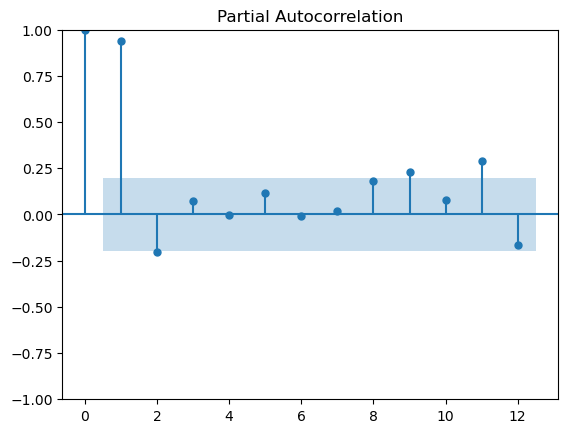

In [76]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Passengers,lags=12)
tsa_plots.plot_pacf(df.Passengers,lags=12)
plt.show()

In [77]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [78]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

13.41127474051367

In [79]:
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

23.530719652100924

In [80]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

5.730867880405072

In [81]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

2.8205573540692814

In [82]:
hwe_model_mul_add = ExponentialSmoothing(df["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
#Forecasting for next 12 time periods
hwe_model_mul_add.forecast(12)

96     312.898312
97     308.169462
98     355.530127
99     345.766661
100    345.692182
101    392.465936
102    436.495826
103    429.853511
104    380.167289
105    332.311686
106    290.619912
107    330.583324
dtype: float64

In [83]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 572.7/572.7 kB 6.0 MB/s eta 0:00:00


In [84]:
import statsmodels.tsa.seasonal
from pmdarima import auto_arima
df=pd.read_excel("Airlines+Data (1).xlsx",header=0, index_col=0, parse_dates=True)
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


<AxesSubplot:xlabel='Month'>

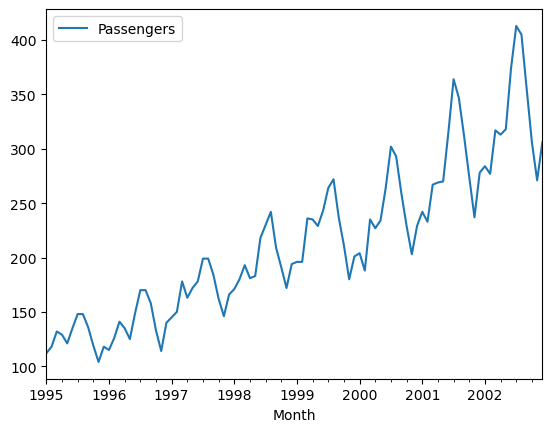

In [85]:
df.plot()

In [86]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.01, False)

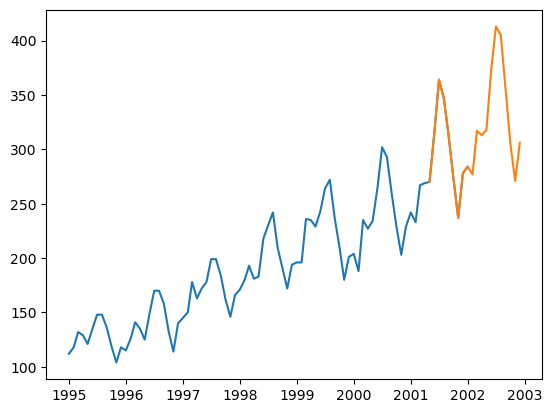

In [87]:
train = df[:85]
test = df[-20:]
plt.plot(train)
plt.plot(test)

In [88]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True,
                        error_action='warn',trace=True,
                        suppress_warnings=True,stepwise=True,
                         random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=543.172, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=537.489, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=537.888, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=540.215, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=539.489, Time=0.14 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=539.489, Time=0.09 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=537.948, Time=0.13 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=539.745, Time=0.04 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=539.466, Time=0.10 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=539.078, Time=0.11 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=537.388, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=540.192, Time=0.06 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=539.385, Time=0.14 sec
 ARIMA(0,1,1)(1,1,1)[12]             

In [89]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -265.694
Date:                             Wed, 11 Oct 2023   AIC                            537.388
Time:                                     13:10:40   BIC                            544.218
Sample:                                 01-01-1995   HQIC                           540.108
                                      - 01-01-2002                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2607      0.105     -2.472      0.013      -0.467      -0.054
ar.S.L12      -0.2625      0.098     -2.683      0.007      -0.454      -0.071
sigma2        92.7245     16.167      5.735      0.000      61.038     124.411
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.62
Prob(Q):                              0.99   Prob(JB):                         0.27
Heteroskedasticity (H):               2.60   Skew:                             0.45
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_pass']
prediction

,predicted_pass
Month,
2001-05-01,NaN
2001-06-01,NaN
2001-07-01,NaN
2001-08-01,NaN
2001-09-01,NaN
2001-10-01,NaN
2001-11-01,NaN
2001-12-01,NaN
2002-01-01,NaN


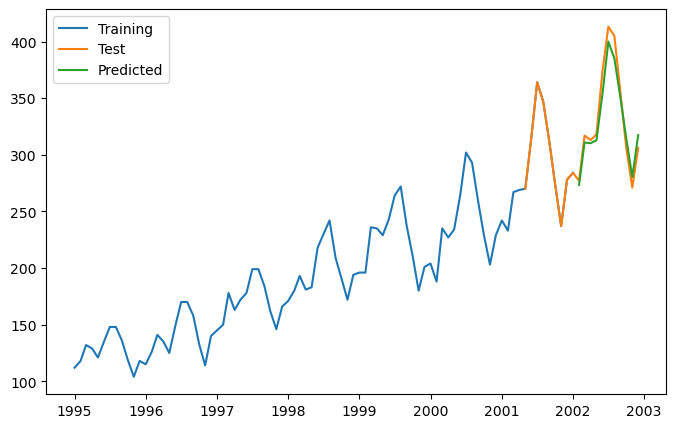

In [91]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Training')
plt.plot(test, label='Test')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'upper left')
plt.show()

In [97]:
X = train.values
X

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [98]:
X = X.astype('float32')
X

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [99]:
train_size = int(len(X) * 0.50)
train_size

42

In [100]:
train, test = X[0:train_size], X[train_size:]
train

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.]], dtype=float32)

In [101]:
test

array([[230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [302.],
       [293.],
       [259.],
       [229.],
       [203.],
       [229.],
       [242.],
       [233.],
       [267.],
       [269.],
       [270.],
       [315.],
       [364.],
       [347.],
       [312.],
       [274.],
       [237.],
       [278.],
       [284.]], dtype=float32)

In [102]:
history = [x for x in train]
import warnings
history

[array([112.], dtype=float32),
 array([118.], dtype=float32),
 array([132.], dtype=float32),
 array([129.], dtype=float32),
 array([121.], dtype=float32),
 array([135.], dtype=float32),
 array([148.], dtype=float32),
 array([148.], dtype=float32),
 array([136.], dtype=float32),
 array([119.], dtype=float32),
 array([104.], dtype=float32),
 array([118.], dtype=float32),
 array([115.], dtype=float32),
 array([126.], dtype=float32),
 array([141.], dtype=float32),
 array([135.], dtype=float32),
 array([125.], dtype=float32),
 array([149.], dtype=float32),
 array([170.], dtype=float32),
 array([170.], dtype=float32),
 array([158.], dtype=float32),
 array([133.], dtype=float32),
 array([114.], dtype=float32),
 array([140.], dtype=float32),
 array([145.], dtype=float32),
 array([150.], dtype=float32),
 array([178.], dtype=float32),
 array([163.], dtype=float32),
 array([172.], dtype=float32),
 array([178.], dtype=float32),
 array([199.], dtype=float32),
 array([199.], dtype=float32),
 array([

In [103]:
predictions = list()

for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))


>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>

In [104]:
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 25.741


In [109]:
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 12)
forecast

array([285.00468874, 301.32003688, 310.01176171, 324.0483203 ,
       327.66615884, 330.76191633, 324.63978439, 318.33122004,
       307.97385257, 300.98287259, 295.03963593, 294.51824234])

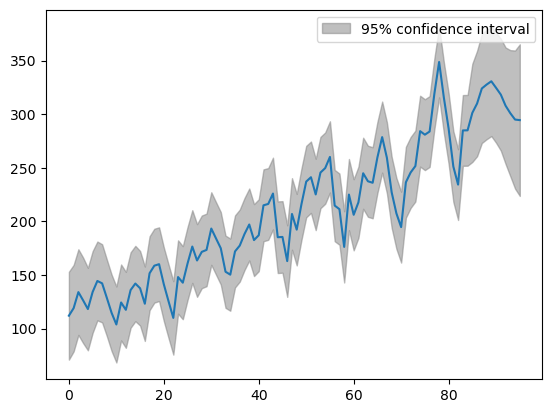

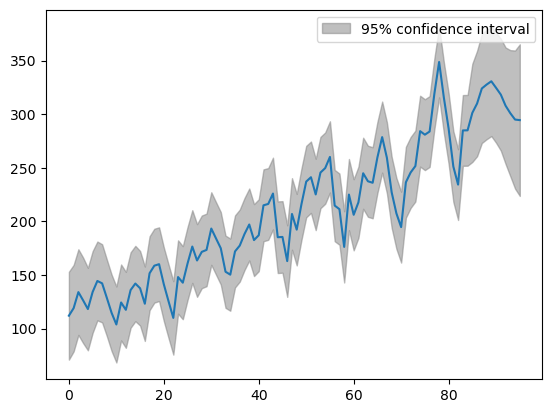

In [110]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)
#model_fit.plot_predict(1, 96)

In [111]:
rohu=pd.read_excel("Airlines+Data (1).xlsx",header=0, index_col=0, parse_dates=True)

In [112]:
X = train.values
X = X.astype('float32')

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [113]:
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()
forecast=model_fit.forecast(steps=12)
forecast

array([285.00468874, 301.32003688, 310.01176171, 324.0483203 ,
       327.66615884, 330.76191633, 324.63978439, 318.33122004,
       307.97385257, 300.98287259, 295.03963593, 294.51824234])

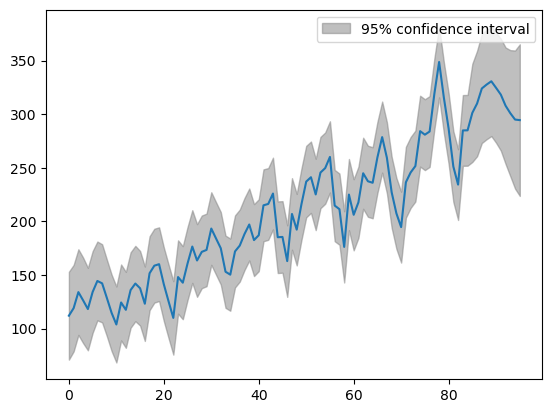

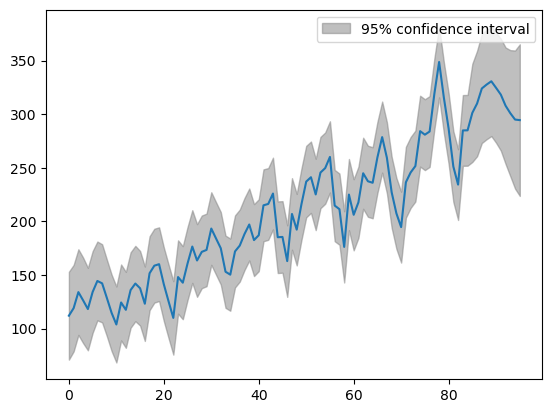

In [114]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

In [121]:
coke=pd.read_excel('CocaCola_Sales_Rawdata (1).xlsx')
coke

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [122]:
coke.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [123]:
coke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [124]:
coke.shape

(42, 2)

In [125]:
coke.dtypes

Quarter     object
Sales      float64
dtype: object

In [126]:
coke.duplicated().value_counts()

False    42
dtype: int64

In [127]:
coke.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [128]:
coke.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


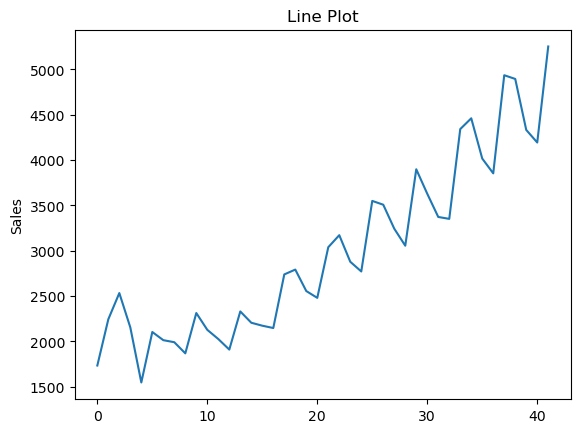

In [129]:
plt.title("Line Plot")
plt.ylabel("Sales")
plt.plot(coke['Sales'])

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

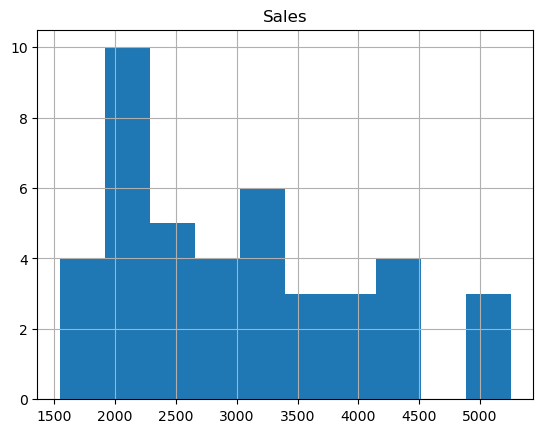

In [130]:
coke.hist()

Text(0.5, 1.0, 'Density Plot')

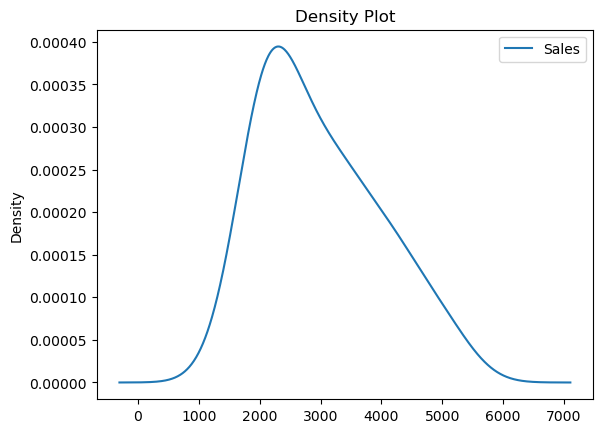

In [131]:
coke.plot(kind = 'kde')
plt.title("Density Plot")

In [132]:
quarters = ['Q1','Q2','Q3','Q4']
n = coke['Quarter'][0]
n[0:2]

'Q1'

In [133]:
coke['quarter'] = 0
for i in range(42):
    n = coke['Quarter'][i]
    coke['quarter'][i] = n[0:2]
dummy = pd.DataFrame(pd.get_dummies(coke['quarter']))
dummy

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [134]:
data=pd.concat([coke,dummy],axis=1)
data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [135]:
data["t"] = np.arange(1,43)

data["t_squared"] = data["t"]*data["t"]
data.columns
data["log_Sales"] = np.log(data["Sales"])
data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


<AxesSubplot:xlabel='quarter', ylabel='Quarter'>

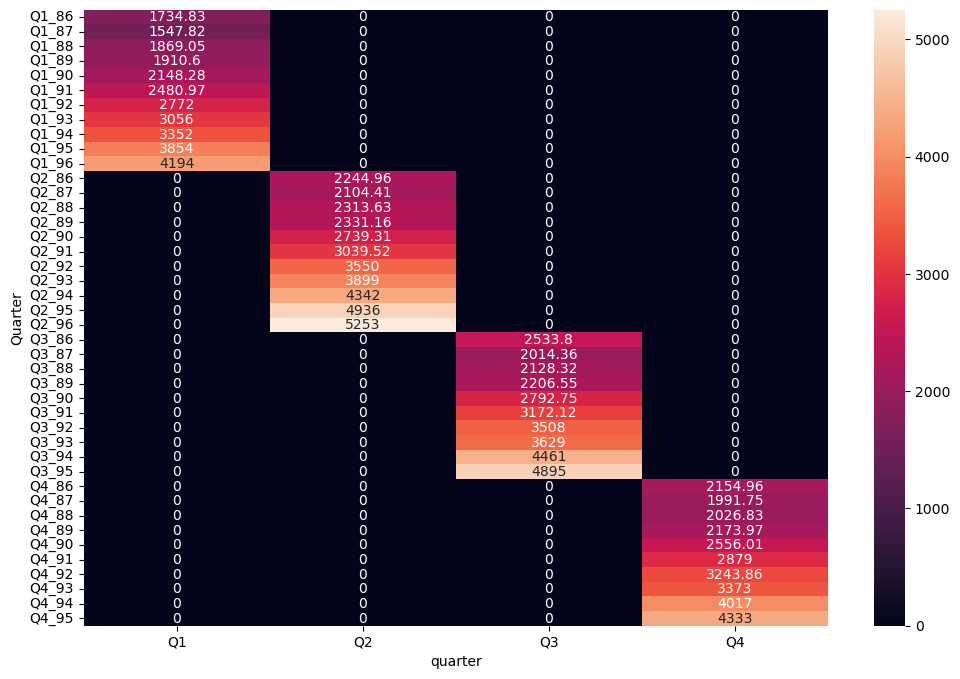

In [136]:
plt.figure(figsize=(12,8))
heatmap_y_quarter = pd.pivot_table(data=data,values="Sales",index="Quarter",columns="quarter",aggfunc="mean", fill_value = 0)
sns.heatmap(heatmap_y_quarter,annot=True,fmt="g")

<AxesSubplot:xlabel='quarter', ylabel='Sales'>

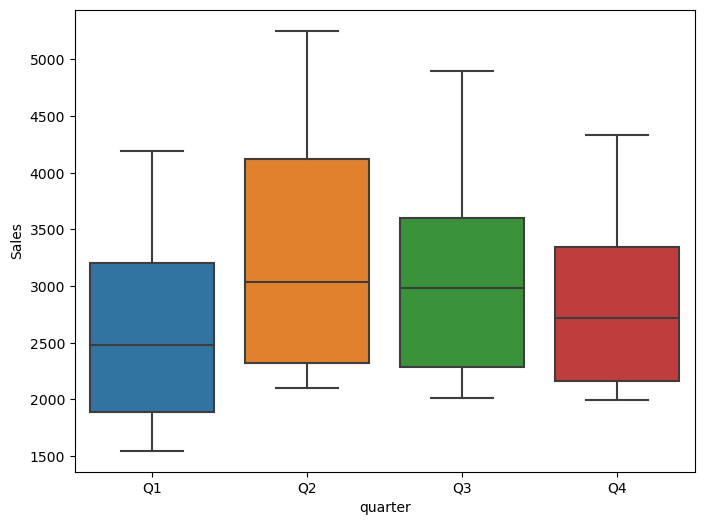

In [137]:
plt.figure(figsize=(8,6))
sns.boxplot(x="quarter",y="Sales",data=data)

Text(0.5, 1.0, 'Lag Plot')

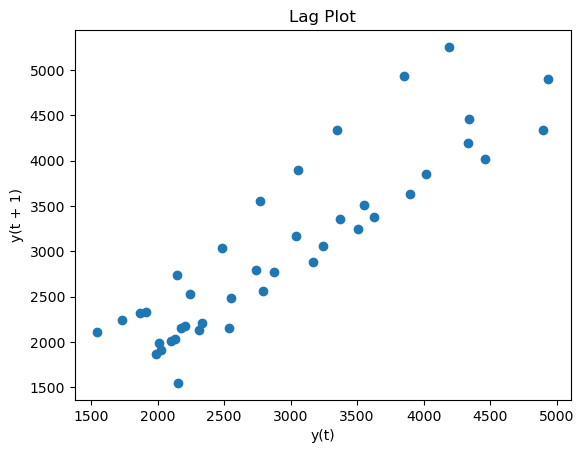

In [138]:
from pandas.plotting import lag_plot
lag_plot(data['Sales'])
plt.title("Lag Plot")

Text(0, 0.5, 'Autocorrelation (r2 value)')

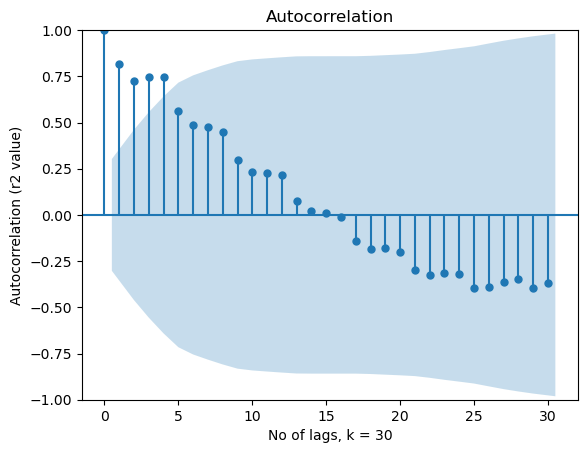

In [139]:
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(data['Sales'], lags = 30)                                              
plt.xlabel("No of lags, k = 30")
plt.ylabel("Autocorrelation (r2 value)")

<AxesSubplot:xlabel='quarter', ylabel='Sales'>

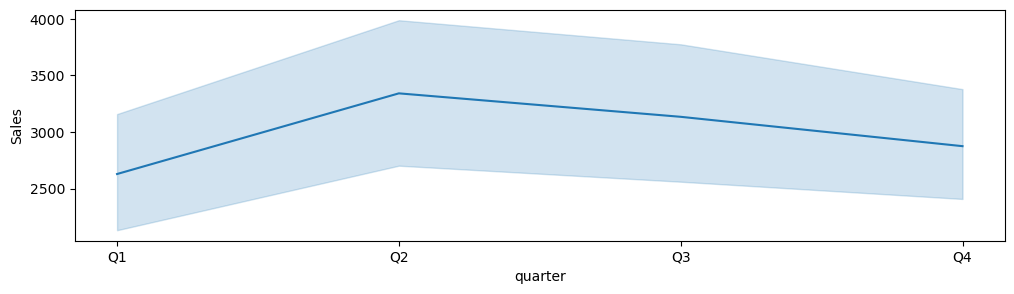

In [140]:
plt.figure(figsize=(12,3))
sns.lineplot(x="quarter",y="Sales",data=data)

<AxesSubplot:>

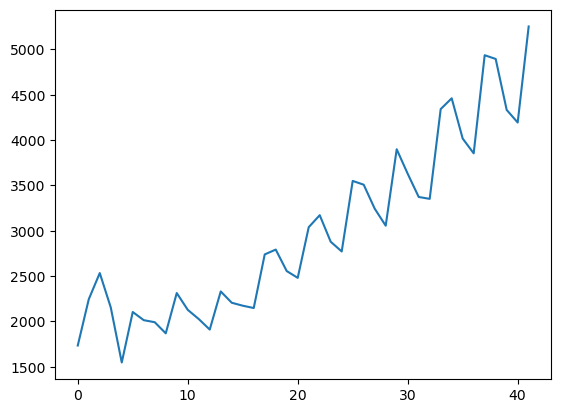

In [141]:
data['Sales'].plot()

In [142]:
train = data.head(37)
test  = data.tail(4)
train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [143]:
test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


In [144]:
import statsmodels.formula.api as smf
linear = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

671.6427504390426

In [145]:
Exp = smf.ols('log_Sales~t',data=train).fit() 
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Exp)))**2))
print("Root Mean Square Error : ",rmse_Exp)

Root Mean Square Error :  513.4107967981105


In [146]:
Quad = smf.ols('Sales~t+t_squared',data=train).fit() 
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
print("Root Mean Square Error : ",rmse_Quad)

Root Mean Square Error :  424.2400896279167


In [147]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit() 
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
print("Root Mean Square Error : ",rmse_add_sea)

Root Mean Square Error :  1917.8628612596376


In [148]:
add_sea_quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit() 
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test[['t','t_squared','Q1','Q2','Q3','Q4']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
print("Root Mean Square Error : ",rmse_add_sea_quad)

Root Mean Square Error :  265.82796918596034


In [149]:
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = train).fit() 
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
print("Root Mean Square Error : ",rmse_Mult_sea)

Root Mean Square Error :  2010.1194325040885


In [150]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = train).fit() 
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("Root Mean Square Error : ",rmse_Mult_add_sea) 

Root Mean Square Error :  262.4958466946683


In [151]:
Final_data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
Final_result = pd.DataFrame(Final_data)
Final_result.sort_values(['RMSE_Values'],ascending=True)

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,262.495847
4,rmse_add_sea_quad,265.827969
2,rmse_Quad,424.240090
1,rmse_Exp,513.410797
0,rmse_linear,671.642750
3,rmse_add_sea,1917.862861
5,rmse_Mult_sea,2010.119433


In [152]:
Final_pred = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=data).fit()
pred_new  = pd.Series(Final_pred.predict(data))
pred_new

0     7.339224
1     7.579747
2     7.571328
3     7.491254
4     7.435892
5     7.676415
6     7.667996
7     7.587922
8     7.532561
9     7.773084
10    7.764665
11    7.684591
12    7.629229
13    7.869752
14    7.861333
15    7.781259
16    7.725898
17    7.966421
18    7.958002
19    7.877928
20    7.822566
21    8.063089
22    8.054670
23    7.974596
24    7.919235
25    8.159758
26    8.151339
27    8.071265
28    8.015903
29    8.256426
30    8.248007
31    8.167933
32    8.112572
33    8.353095
34    8.344676
35    8.264602
36    8.209240
37    8.449763
38    8.441344
39    8.361270
40    8.305909
41    8.546432
dtype: float64

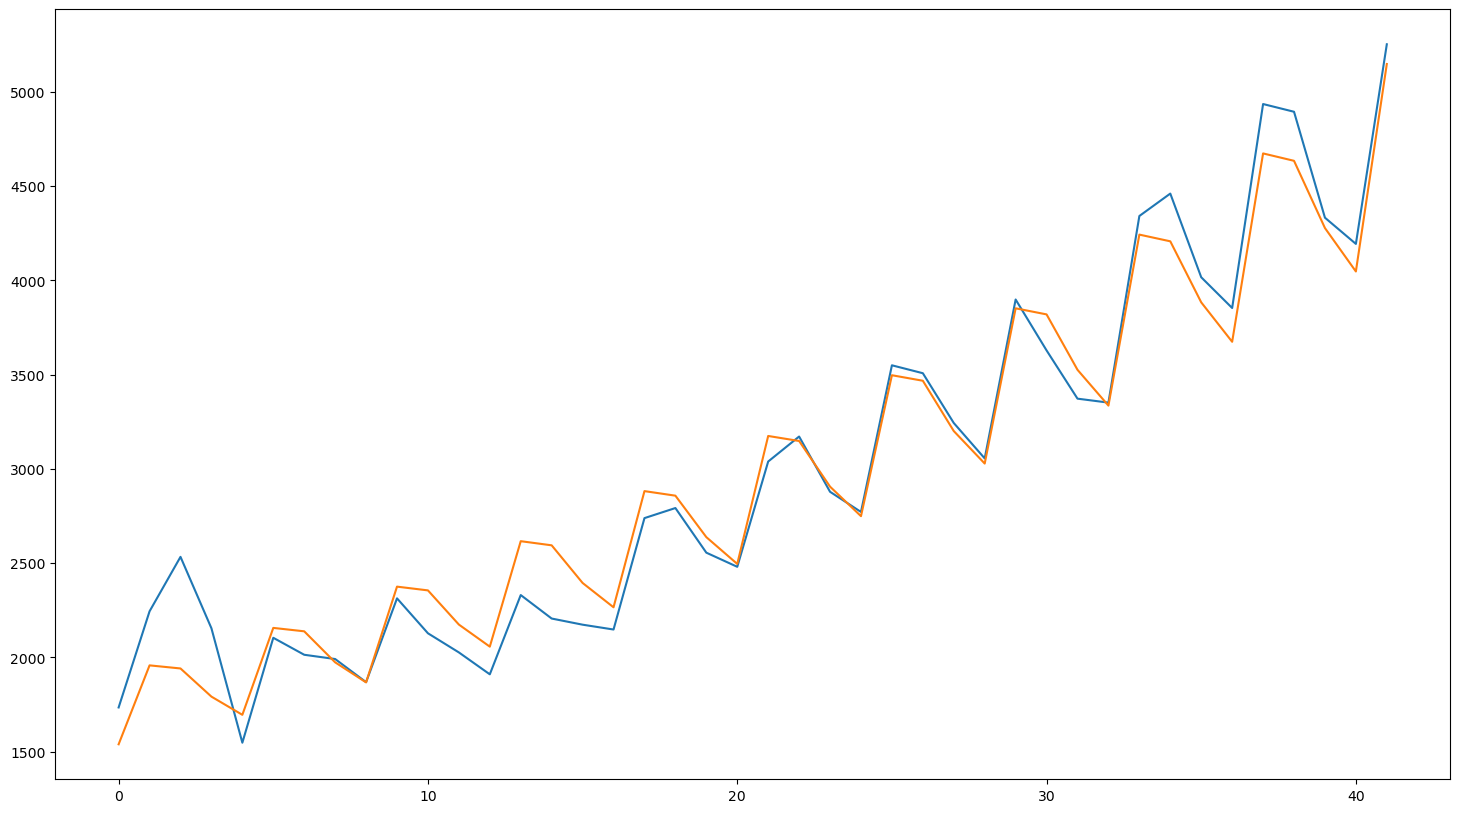

In [153]:
coke["forecasted_Sales"] = pd.Series(np.exp(pred_new))
plt.figure(figsize=(18,10))
plt.plot(coke[['Sales','forecasted_Sales']].reset_index(drop=True))

In [154]:
Train = coke.head(37)
Test = coke.tail(4)

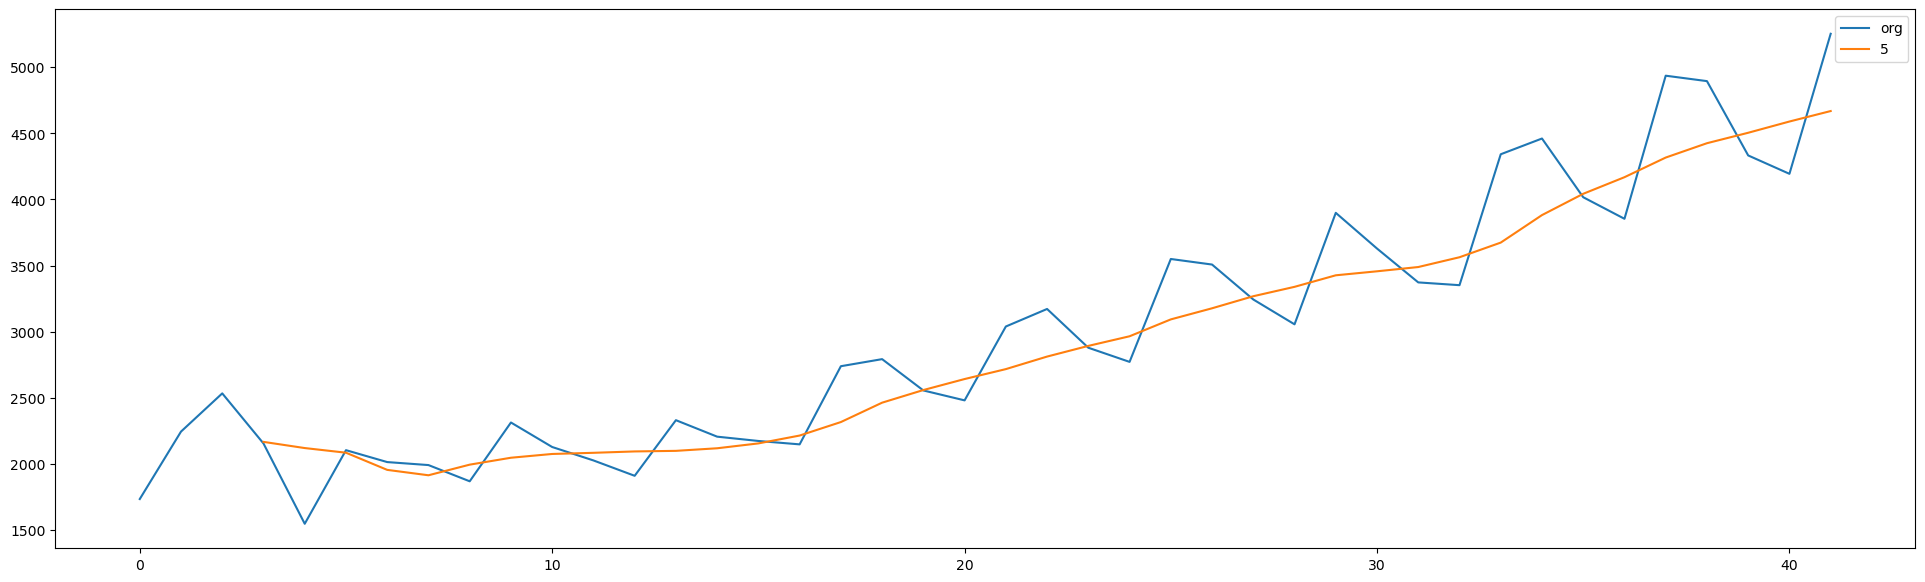

In [155]:
plt.figure(figsize=(24,7))
coke['Sales'].plot(label="org")
coke["Sales"].rolling(4).mean().plot(label=str(5))
plt.legend(loc='best')

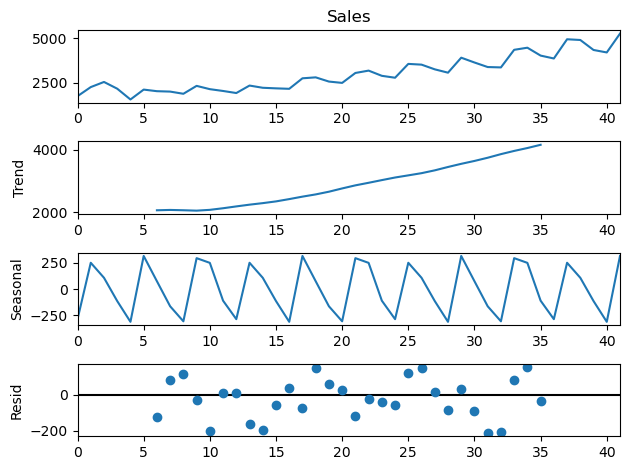

In [156]:
decompose_ts_add = seasonal_decompose(coke['Sales'], period = 12)
decompose_ts_add.plot()
plt.show()

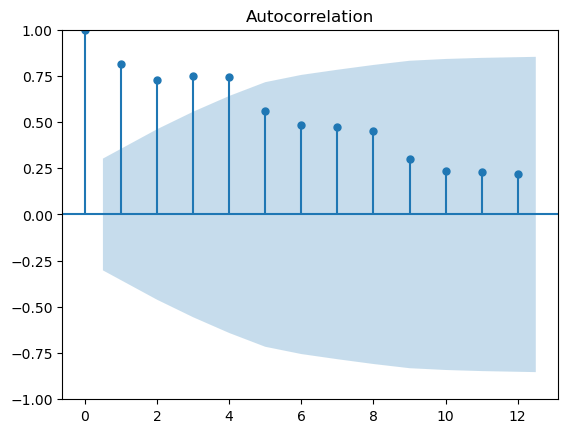

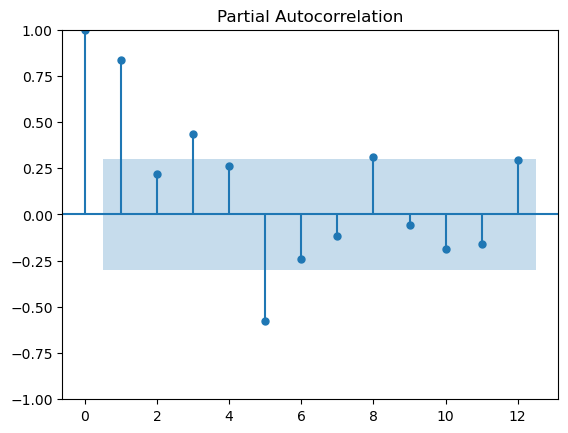

In [157]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coke.Sales,lags=12)
tsa_plots.plot_pacf(coke.Sales,lags=12)
plt.show()

In [158]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [159]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

18.112880232616032

In [160]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

12.906370973866597

In [161]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

4.647439223620075

In [162]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

2.9956119457830868

In [ ]:
#Inference:
#Holts Winter ES with Multilicative Seasonal & additive gives minimum error 2.99